# IoT based gesture recognition 

Gestures are mapped to the corresponding accelerometer and gyroscope values recorded during motion. Here, we have accelerometer and gyroscope values along x, y, z axes recorded 100 times for one gesture, i.e, 600 data points for one gesture.

In [2]:
import pandas as pd
import csv
import os
import tensorflow as tf
tf.keras.Model()
import keras
from sklearn import preprocessing
from sklearn.preprocessing import normalize, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import urllib

List of gestures used

In [3]:
gestures = ['down_to_up', 'forward_clockwise', 'left_fall', 'up_clockwise', 'up_anticlockwise', 'left_to_right', 'right_to_left', 'forward_fall']

In [4]:
df = pd.read_csv('gesture60_8_.csv')

In [5]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,...,591,592,593,594,595,596,597,598,599,600
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,...,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
mean,0.118386,9.566627,1.698821,0.011603,0.009892,-0.002908,0.099369,9.565779,1.689824,0.008068,...,1.418663,0.038245,-0.106213,-0.107996,0.220587,9.954167,1.416656,0.027356,-0.090631,-0.101700
std,0.703841,0.279369,0.831210,0.051517,0.053500,0.046253,0.720297,0.293941,0.845079,0.051266,...,1.698537,0.796662,0.457683,0.474309,1.269183,1.071469,1.658199,0.760720,0.452724,0.458888
min,-1.933954,8.013336,-0.763738,-0.128932,-0.153798,-0.231234,-2.139846,8.194091,-0.822394,-0.243105,...,-3.105167,-2.199004,-1.979139,-3.179299,-5.571787,7.287924,-3.366123,-1.720785,-1.979139,-3.179299
25%,-0.295193,9.464160,1.139570,-0.017051,-0.019408,-0.023593,-0.313149,9.456978,1.138373,-0.020370,...,0.302833,-0.225265,-0.280473,-0.172726,-0.412504,9.411489,0.253754,-0.225265,-0.256171,-0.168239
50%,0.132154,9.620974,1.685425,0.004855,0.003759,-0.004221,0.108213,9.619776,1.671060,0.002703,...,1.356236,-0.003910,-0.020185,-0.020954,0.281785,9.721525,1.401724,-0.003096,-0.012232,-0.020954
75%,0.505633,9.749058,2.198959,0.029015,0.031472,0.016665,0.511618,9.763422,2.165442,0.026513,...,2.431187,0.168536,0.119925,0.075179,0.978468,10.002832,2.425201,0.168649,0.131660,0.075179
max,2.157561,10.012409,5.086242,0.319155,0.253930,0.286086,2.163547,10.017197,5.106592,0.319155,...,6.726200,3.547310,1.702801,1.138848,3.912436,14.320589,6.845904,3.046983,1.702801,1.138848


Normalize and shuffle

In [6]:
df[df.columns[:-1]] = normalize(df[df.columns[:-1]])
df = df.sample(frac=1, random_state=13).reset_index(drop = True)
df

,1,2,3,4,5,6,7,8,9,10,...,592,593,594,595,596,597,598,599,600,Gesture
0,0.003022,0.093937,0.011679,-0.000629,0.000282,-0.000210,0.002838,0.093238,0.010267,-0.000629,...,0.024808,0.002097,-0.001888,0.000016,0.090347,-0.011931,0.024808,0.002097,-0.001888,forward_fall
1,0.000798,0.096556,0.020467,-0.000109,-0.000561,-0.001020,0.000401,0.095487,0.020298,-0.000109,...,0.000335,-0.000426,-0.000641,0.004812,0.097926,0.013797,0.000335,-0.000426,-0.000641,right_to_left
2,0.002546,0.090785,0.027262,0.000192,0.000018,-0.000177,0.004073,0.091596,0.029648,0.000192,...,0.000269,0.000499,-0.000634,0.003202,0.099697,-0.008268,-0.000968,-0.000035,-0.000430,down_to_up
3,0.017293,0.095955,0.019115,-0.000139,0.000187,-0.000324,0.017862,0.096802,0.019986,-0.000139,...,-0.001582,0.000178,-0.000643,-0.007194,0.099899,0.022321,-0.001582,0.000178,-0.000643,left_to_right
4,-0.000055,0.095312,0.020812,-0.000233,0.000047,0.000046,-0.000883,0.095468,0.022240,-0.000233,...,0.000294,-0.001089,-0.000150,-0.000919,0.089743,-0.005857,0.000294,-0.001089,-0.000150,down_to_up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0.012845,0.098365,0.013678,-0.000165,-0.000197,0.000305,0.012250,0.099106,0.013836,-0.000165,...,0.000217,0.000280,-0.000531,-0.003093,0.097247,0.024952,0.000217,0.000280,-0.000531,left_to_right
473,-0.002079,0.080596,0.006062,0.000606,0.000420,-0.000667,-0.002528,0.080146,0.005661,0.000606,...,0.000380,0.000523,0.001311,0.000933,0.080889,0.000381,0.000380,0.000523,0.001311,left_fall
474,0.011863,0.095148,0.028367,-0.000533,-0.000350,-0.000925,0.011118,0.095004,0.028283,-0.000533,...,-0.001097,0.001230,-0.003628,-0.007168,0.095688,0.020857,-0.001097,0.001230,-0.003628,right_to_left
475,0.007047,0.093727,0.008762,0.000426,0.000409,-0.000170,0.006576,0.094048,0.008969,0.000426,...,0.016682,-0.000295,-0.002204,0.006072,0.094140,-0.005092,0.001702,0.000295,-0.000190,forward_fall


# Visualization

In [7]:
data = pd.DataFrame(df)

In [8]:
col = ['ax','ay','az','gx','gy','gz']*100
col.append('Gesture')
data.columns = col

In [9]:
def extract(gesture,data_dict):
    k = data[data["Gesture"]==gesture].shape[0]
    for j in range(0,k):
        if j == 0:
            data_dict[gesture] = data[data['Gesture']==gesture].iloc[0:1,0:6]
        else:
            data_dict[gesture] = data_dict[gesture].append(data[data['Gesture']==gesture].iloc[j:j+1,0:6])
        for i in range(6,600,6):
            data_dict[gesture] = data_dict[gesture].append(data[data['Gesture']==gesture].iloc[j:j+1,i:i+6])

In [10]:
data_dict = {}
for i in gestures:
    extract(i,data_dict)
    #print(data_dict[i].head())
#data_dict

In [11]:
def visualize(type, gesture):
    for i in gestures:
        title = type.upper()+' for \"'+i.upper()+'\" gesture'
        plt.title(title)
        if type == 'acceleration':
            index = range(1, len(data_dict[i]['ax']) + 1)
            plt.plot(index, data_dict[i]['ax'], 'g.', label='x', linestyle='solid', marker=',')
            plt.plot(index, data_dict[i]['ay'], 'b.', label='y', linestyle='solid', marker=',')
            plt.plot(index, data_dict[i]['az'], 'r.', label='z', linestyle='solid', marker=',')

        if type == 'gyro':
            index = range(1, len(data_dict[i]['ax']) + 1)
            plt.plot(index, data_dict[i]['gx'], 'g.', label='x', linestyle='solid', marker=',')
            plt.plot(index, data_dict[i]['gy'], 'b.', label='y', linestyle='solid', marker=',')
            plt.plot(index, data_dict[i]['gz'], 'r.', label='z', linestyle='solid', marker=',')

        plt.legend()
        plt.show()

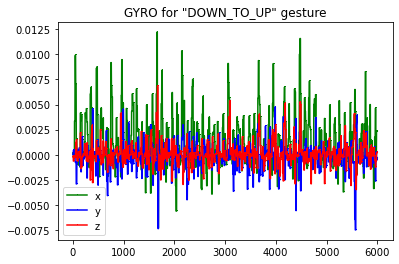

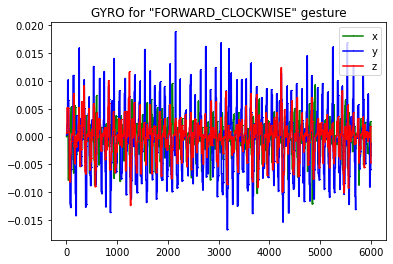

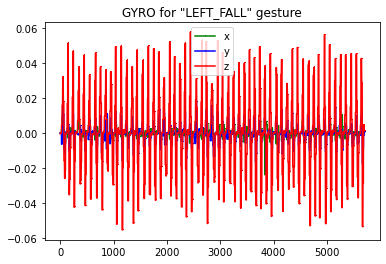

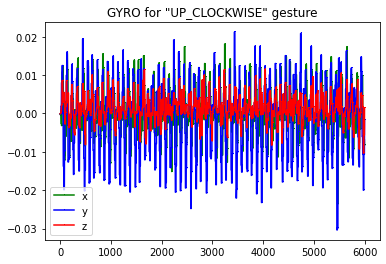

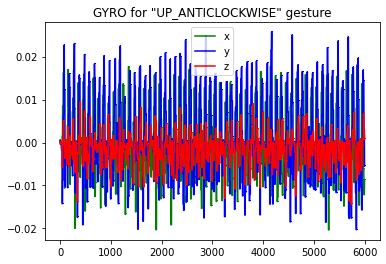

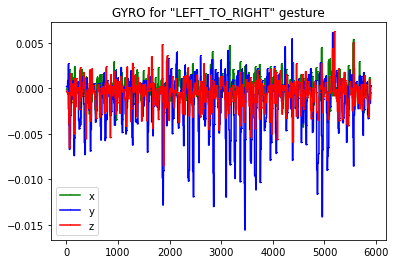

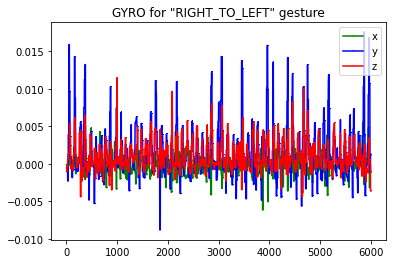

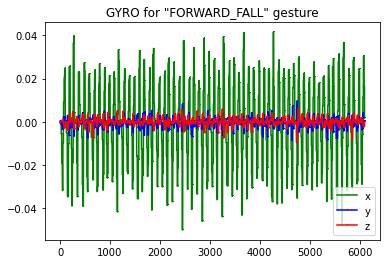

In [12]:
visualize('gyro', gestures)

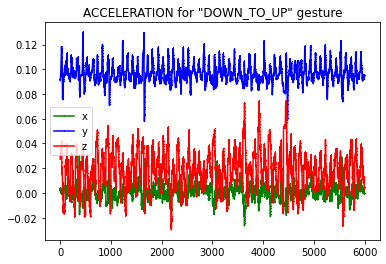

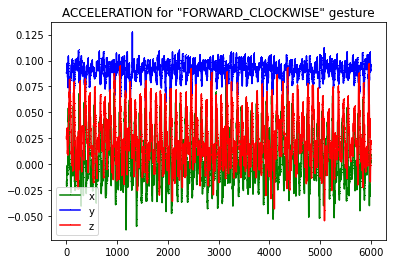

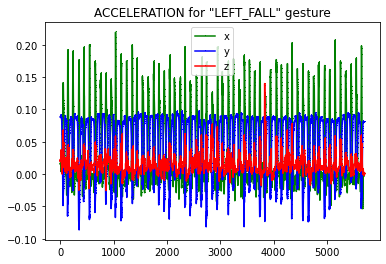

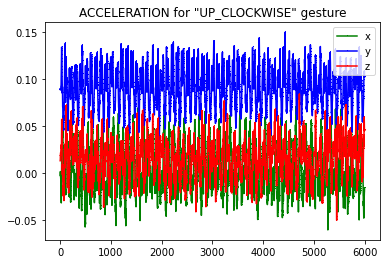

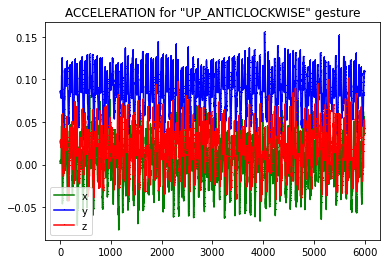

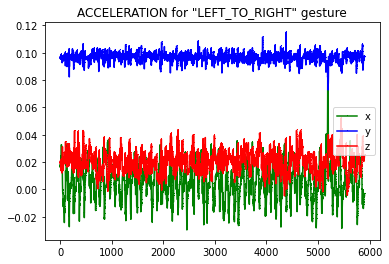

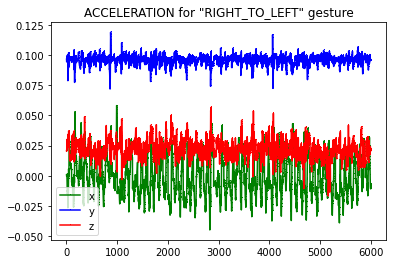

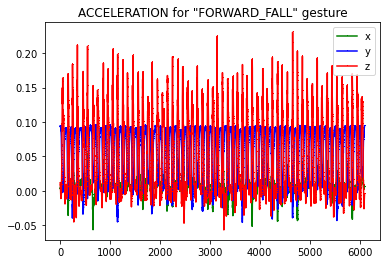

In [13]:
visualize('acceleration', gestures)

In [14]:
df.to_csv('gesture60_8_normalized.csv', index = False)

One hot encoding the labels

In [15]:
y_df = pd.get_dummies(df.Gesture)[gestures]
print(y_df)
print(np.array(y_df)[0].shape)

     down_to_up  forward_clockwise  left_fall  up_clockwise  up_anticlockwise  \
0             0                  0          0             0                 0   
1             0                  0          0             0                 0   
2             1                  0          0             0                 0   
3             0                  0          0             0                 0   
4             1                  0          0             0                 0   
..          ...                ...        ...           ...               ...   
472           0                  0          0             0                 0   
473           0                  0          1             0                 0   
474           0                  0          0             0                 0   
475           0                  0          0             0                 0   
476           0                  1          0             0                 0   

     left_to_right  right_t

In [16]:
df = pd.concat([df, y_df], axis=1)
df.head()

,ax,ay,az,gx,gy,gz,ax,ay,az,gx,...,gz,Gesture,down_to_up,forward_clockwise,left_fall,up_clockwise,up_anticlockwise,left_to_right,right_to_left,forward_fall
0,0.003022,0.093937,0.011679,-0.000629,0.000282,-0.000210,0.002838,0.093238,0.010267,-0.000629,...,-0.001888,forward_fall,0,0,0,0,0,0,0,1
1,0.000798,0.096556,0.020467,-0.000109,-0.000561,-0.001020,0.000401,0.095487,0.020298,-0.000109,...,-0.000641,right_to_left,0,0,0,0,0,0,1,0
2,0.002546,0.090785,0.027262,0.000192,0.000018,-0.000177,0.004073,0.091596,0.029648,0.000192,...,-0.000430,down_to_up,1,0,0,0,0,0,0,0
3,0.017293,0.095955,0.019115,-0.000139,0.000187,-0.000324,0.017862,0.096802,0.019986,-0.000139,...,-0.000643,left_to_right,0,0,0,0,0,1,0,0
4,-0.000055,0.095312,0.020812,-0.000233,0.000047,0.000046,-0.000883,0.095468,0.022240,-0.000233,...,-0.000150,down_to_up,1,0,0,0,0,0,0,0


In [17]:
train_count = int(0.8*len(df))
test_count = len(df) - train_count
print(train_count, test_count)

x_train, y_train = np.array(df)[:train_count, :600].astype('float32'), np.array(df)[:train_count, -(len(gestures)):].astype('int64')
x_test, y_test = np.array(df)[train_count:, :600].astype('float32'), np.array(df)[train_count:, -(len(gestures)):].astype('int64')

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

381 96
(381, 600) (381, 8) (96, 600) (96, 8)


In [18]:
x_train[0].shape

(600,)

# Model

In [19]:
bigmodel = tf.keras.models.Sequential()
bigmodel.add(tf.keras.layers.Dense(512, activation="relu", input_shape = (600,)))
bigmodel.add(tf.keras.layers.Dense(128, activation="relu"))
bigmodel.add(tf.keras.layers.Dense(64, activation="relu"))
bigmodel.add(tf.keras.layers.Dense(len(gestures), activation="softmax"))

In [20]:
bigmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               307712    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 520       
Total params: 382,152
Trainable params: 382,152
Non-trainable params: 0
_________________________________________________________________


In [21]:
bigmodel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
bigmodel.fit(x_train, y_train, epochs = 16, batch_size = 8)

Epoch 1/16
48/48 [==============================] - 2s 5ms/step - loss: 1.7731 - accuracy: 0.3755
Epoch 2/16
48/48 [==============================] - 0s 4ms/step - loss: 0.5422 - accuracy: 0.8342
Epoch 3/16
48/48 [==============================] - 0s 4ms/step - loss: 0.1928 - accuracy: 0.9608
Epoch 4/16
48/48 [==============================] - 0s 4ms/step - loss: 0.1078 - accuracy: 0.9745
Epoch 5/16
48/48 [==============================] - 0s 4ms/step - loss: 0.0618 - accuracy: 0.9911
Epoch 6/16
48/48 [==============================] - 0s 5ms/step - loss: 0.0289 - accuracy: 0.9968
Epoch 7/16
48/48 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9961
Epoch 8/16
48/48 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 9/16
48/48 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 1.0000
Epoch 10/16
48/48 [==============================] - 0s 5ms/step - loss: 0.0101 - accuracy: 1.0000
Epoch 11/16
48/48 [

In [42]:
bigmodel.evaluate(x_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.9479


[0.26029565930366516, 0.9479166865348816]

In [43]:
y_pred = bigmodel.predict(x_test)

#for i in range(len(y_pred)):
for i in range(30):
    m = max(y_pred[i])
    j = np.where(y_pred[i] == m)[0][0]
    k = np.where(y_test[i] == 1)[0][0]
    if(j!=k):
        print("------- Mismatch -------")
    print("Actual: " + gestures[k] + "\nPredicted: " + gestures[j] + "\nConfidence: " + str(m) + "\n")

Actual: up_clockwise
Predicted: up_clockwise
Confidence: 0.9989717

Actual: up_anticlockwise
Predicted: up_anticlockwise
Confidence: 0.9997757

Actual: forward_fall
Predicted: forward_fall
Confidence: 0.9999317

Actual: forward_fall
Predicted: forward_fall
Confidence: 0.9998702

Actual: left_to_right
Predicted: left_to_right
Confidence: 0.9978004

Actual: down_to_up
Predicted: down_to_up
Confidence: 0.98720783

------- Mismatch -------
Actual: up_clockwise
Predicted: down_to_up
Confidence: 0.9164214

Actual: up_clockwise
Predicted: up_clockwise
Confidence: 0.9999938

Actual: left_fall
Predicted: left_fall
Confidence: 1.0

Actual: forward_clockwise
Predicted: forward_clockwise
Confidence: 0.9998754

Actual: down_to_up
Predicted: down_to_up
Confidence: 0.99941945

Actual: left_fall
Predicted: left_fall
Confidence: 1.0

Actual: down_to_up
Predicted: down_to_up
Confidence: 0.9988238

Actual: left_fall
Predicted: left_fall
Confidence: 1.0

Actual: right_to_left
Predicted: right_to_left
Conf

# Smaller model

In [56]:
smallmodel = tf.keras.models.Sequential()
smallmodel.add(tf.keras.layers.Dense(16, activation="relu", input_shape = (600,)))
smallmodel.add(tf.keras.layers.Dense(8, activation="relu"))
smallmodel.add(tf.keras.layers.Dense(4, activation="relu"))
smallmodel.add(tf.keras.layers.Dense(len(gestures), activation="softmax"))

smallmodel.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

smallmodel.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                9616      
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 40        
Total params: 9,828
Trainable params: 9,828
Non-trainable params: 0
_________________________________________________________________


In [57]:
smallmodel.fit(x_train, y_train, epochs = 32, batch_size = 16)
smallmodel.evaluate(x_test, y_test)

Epoch 1/32
24/24 [==============================] - 0s 1ms/step - loss: 2.0772 - accuracy: 0.1652
Epoch 2/32
24/24 [==============================] - 0s 1ms/step - loss: 2.0449 - accuracy: 0.3476
Epoch 3/32
24/24 [==============================] - 0s 1ms/step - loss: 1.9913 - accuracy: 0.2956
Epoch 4/32
24/24 [==============================] - 0s 1ms/step - loss: 1.9253 - accuracy: 0.2647
Epoch 5/32
24/24 [==============================] - 0s 1ms/step - loss: 1.8334 - accuracy: 0.2964
Epoch 6/32
24/24 [==============================] - 0s 1ms/step - loss: 1.7526 - accuracy: 0.2560
Epoch 7/32
24/24 [==============================] - 0s 1ms/step - loss: 1.6734 - accuracy: 0.2727
Epoch 8/32
24/24 [==============================] - 0s 1ms/step - loss: 1.5791 - accuracy: 0.3133
Epoch 9/32
24/24 [==============================] - 0s 1ms/step - loss: 1.5358 - accuracy: 0.2819
Epoch 10/32
24/24 [==============================] - 0s 1ms/step - loss: 1.5038 - accuracy: 0.3094
Epoch 11/32
24/24 [

3/3 [==============================] - 0s 1ms/step - loss: 0.7536 - accuracy: 0.6667


[0.7535781860351562, 0.6666666865348816]

## Convert the model to the TensorFlow Lite format without quantization

In [46]:
converter = tf.lite.TFLiteConverter.from_keras_model(bigmodel)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: C:\Users\ARRUN\AppData\Local\Temp\tmptgbhudb8\assets
Model is 1530780 bytes


## Saving Model to be loaded as a Arduino header file

In [49]:
bigmodel.save('gestureTinyModel.h5')

In [50]:
model = tf.keras.models.load_model('gestureTinyModel.h5')

In [51]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.9479


[0.26029565930366516, 0.9479166865348816]

## Convert the model to the TensorFlow Lite format with 8-Bit integer

In [52]:
#having a representative data for float fallback and 8 bit integer quantization
def representative_data_gen():
    for input_value in tf.data.Dataset.from_tensor_slices(x_train):
        yield [input_value]

In [53]:
converter = tf.lite.TFLiteConverter.from_keras_model(bigmodel)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model_quant = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\ARRUN\AppData\Local\Temp\tmpbn22u26o\assets


INFO:tensorflow:Assets written to: C:\Users\ARRUN\AppData\Local\Temp\tmpbn22u26o\assets


AttributeError: module 'tensorflow.lite.python.schema_py_generated' has no attribute 'Model'